In [1]:
import sys
import os
script_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(script_dir)
sys.path.insert(0, parent_dir)

import cnn_functions
import models
import pickle
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torch.utils.tensorboard import SummaryWriter

In [2]:
# Use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

multiclass_labels_map = {
    0: "Truck",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Plane",
}

binary_labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Compose the transform to perform on the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.MultioutputCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.MultioutputCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/test'), transform=transform)
# Perform a stratified split
stratify_labels = [f"{label['binary']}{label['multiclass']}" for label in val_test_ds.img_labels]
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=stratify_labels, # Uniform class distribution
    random_state=0
)
# Define the subsets
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda


/home/scardovi/ai-generated-image-detection/detection/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))




 - multioutput_lr1e-02_batch32
- Epoch 1: current lr = 1e-02
Train error: Combined=36.29%; Binary=10.06%; multiclass=29.49%; 
Validation error: Combined=36.90%; Binary=10.45%; multiclass=30.05%; 
Loss: 1.772e+00
- Epoch 2: current lr = 1e-02
Train error: Combined=27.34%; Binary=6.80%; multiclass=22.16%; 
Validation error: Combined=29.66%; Binary=7.99%; multiclass=23.66%; 
Loss: 9.375e-01
- Epoch 3: current lr = 1e-02
Train error: Combined=22.87%; Binary=6.57%; multiclass=17.97%; 
Validation error: Combined=26.35%; Binary=7.34%; multiclass=21.03%; 
Loss: 7.163e-01
- Epoch 4: current lr = 1e-02
Train error: Combined=28.52%; Binary=6.60%; multiclass=23.84%; 
Validation error: Combined=32.55%; Binary=7.76%; multiclass=27.23%; 
Loss: 6.019e-01
- Epoch 5: current lr = 1e-02
Train error: Combined=13.39%; Binary=2.64%; multiclass=11.14%; 
Validation error: Combined=18.96%; Binary=4.08%; multiclass=15.92%; 
Loss: 5.215e-01
- Epoch 10: current lr = 1e-02
Train error: Combined=7.32%; Binary=1.8

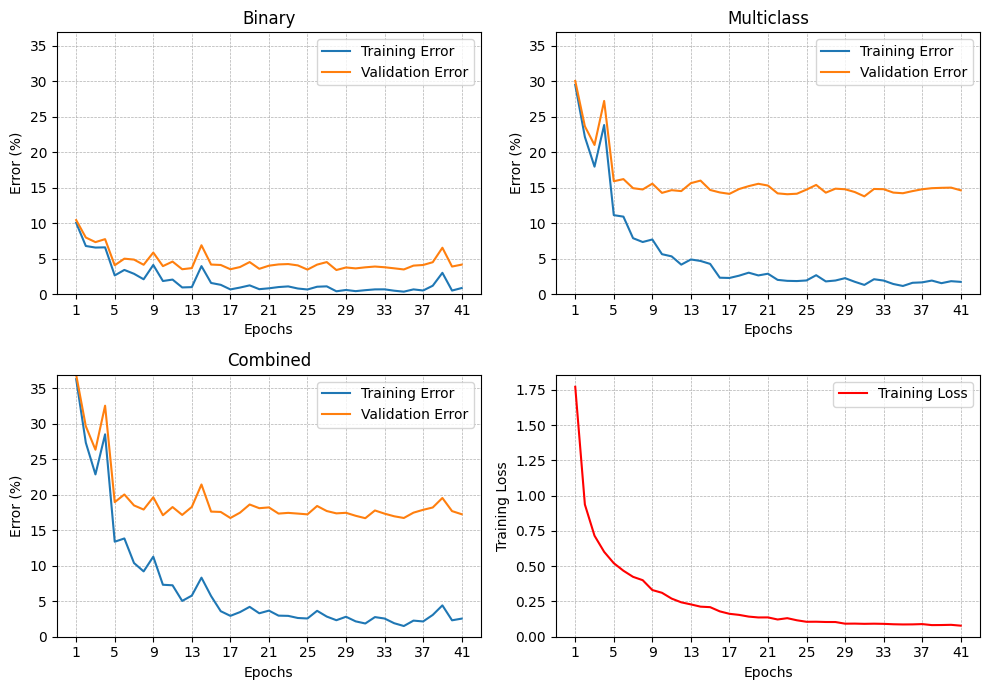



 - multioutput_lr1e-02_batch512
- Epoch 1: current lr = 1e-02
Train error: Combined=18.31%; Binary=4.33%; multiclass=14.93%; 
Validation error: Combined=21.15%; Binary=5.17%; multiclass=17.28%; 
Loss: 9.152e-01
- Epoch 2: current lr = 1e-02
Train error: Combined=11.47%; Binary=2.26%; multiclass=9.46%; 
Validation error: Combined=17.32%; Binary=3.89%; multiclass=14.18%; 
Loss: 4.615e-01
- Epoch 3: current lr = 1e-02
Train error: Combined=9.40%; Binary=1.73%; multiclass=7.83%; 
Validation error: Combined=17.20%; Binary=3.48%; multiclass=14.34%; 
Loss: 3.268e-01
- Epoch 4: current lr = 1e-02
Train error: Combined=6.38%; Binary=1.27%; multiclass=5.19%; 
Validation error: Combined=16.56%; Binary=3.52%; multiclass=13.71%; 
Loss: 2.404e-01
- Epoch 5: current lr = 1e-02
Train error: Combined=5.31%; Binary=0.96%; multiclass=4.45%; 
Validation error: Combined=16.52%; Binary=3.39%; multiclass=13.86%; 
Loss: 1.722e-01
- Epoch 10: current lr = 1e-02
Train error: Combined=1.37%; Binary=0.20%; mult

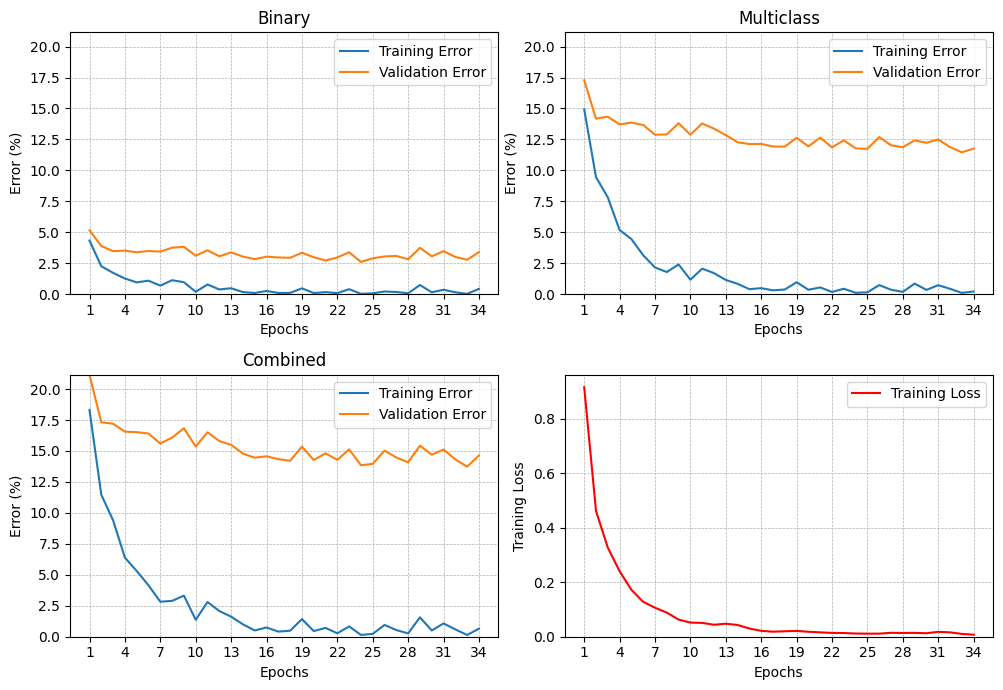



 - multioutput_lr1e-03_batch32
- Epoch 1: current lr = 1e-03
Train error: Combined=16.80%; Binary=3.52%; multiclass=13.95%; 
Validation error: Combined=19.51%; Binary=3.98%; multiclass=16.44%; 
Loss: 9.579e-01
- Epoch 2: current lr = 1e-03
Train error: Combined=13.22%; Binary=3.31%; multiclass=10.43%; 
Validation error: Combined=17.42%; Binary=4.45%; multiclass=13.96%; 
Loss: 6.005e-01
- Epoch 3: current lr = 1e-03
Train error: Combined=10.74%; Binary=2.84%; multiclass=8.23%; 
Validation error: Combined=16.60%; Binary=4.13%; multiclass=13.32%; 
Loss: 4.745e-01
- Epoch 4: current lr = 1e-03
Train error: Combined=7.81%; Binary=1.79%; multiclass=6.18%; 
Validation error: Combined=14.80%; Binary=3.37%; multiclass=12.16%; 
Loss: 4.007e-01
- Epoch 5: current lr = 1e-03
Train error: Combined=6.08%; Binary=1.34%; multiclass=4.84%; 
Validation error: Combined=14.21%; Binary=2.98%; multiclass=11.87%; 
Loss: 3.359e-01
- Epoch 10: current lr = 1e-03
Train error: Combined=1.89%; Binary=0.47%; mul

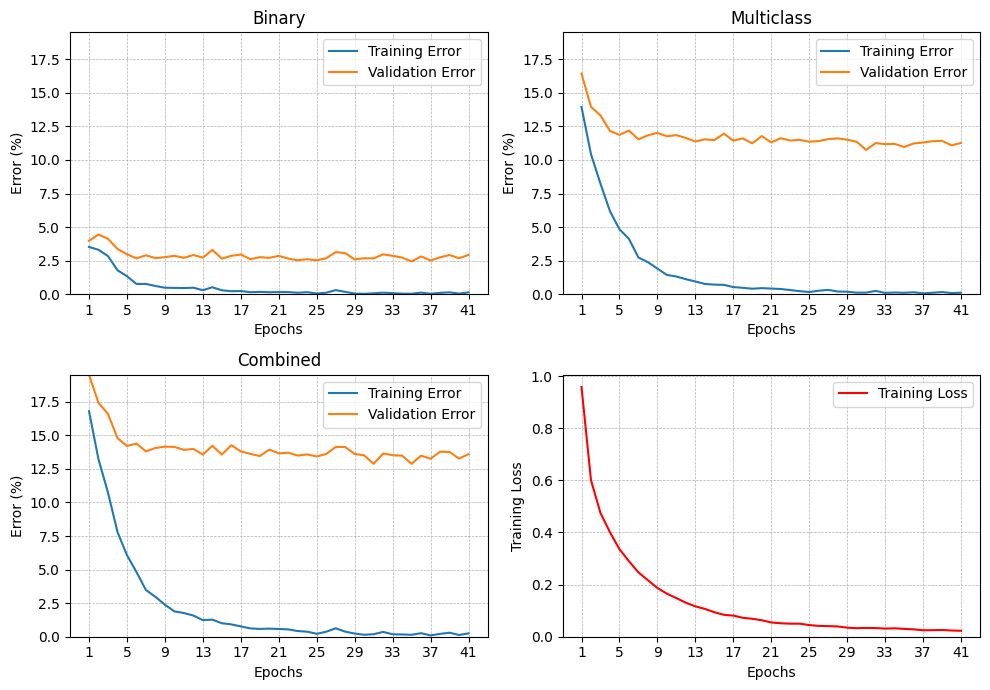



 - multioutput_lr1e-03_batch512
- Epoch 1: current lr = 1e-03
Train error: Combined=31.82%; Binary=7.67%; multiclass=26.73%; 
Validation error: Combined=33.99%; Binary=8.73%; multiclass=28.40%; 
Loss: 1.568e+00
- Epoch 2: current lr = 1e-03
Train error: Combined=23.44%; Binary=4.94%; multiclass=19.80%; 
Validation error: Combined=27.73%; Binary=6.51%; multiclass=23.08%; 
Loss: 8.663e-01
- Epoch 3: current lr = 1e-03
Train error: Combined=19.43%; Binary=3.76%; multiclass=16.52%; 
Validation error: Combined=24.56%; Binary=5.35%; multiclass=20.74%; 
Loss: 6.872e-01
- Epoch 4: current lr = 1e-03
Train error: Combined=16.18%; Binary=2.94%; multiclass=13.75%; 
Validation error: Combined=22.96%; Binary=5.04%; multiclass=19.33%; 
Loss: 5.815e-01
- Epoch 5: current lr = 1e-03
Train error: Combined=13.85%; Binary=2.25%; multiclass=11.95%; 
Validation error: Combined=22.01%; Binary=4.53%; multiclass=18.59%; 
Loss: 5.024e-01
- Epoch 10: current lr = 1e-03
Train error: Combined=4.65%; Binary=0.35

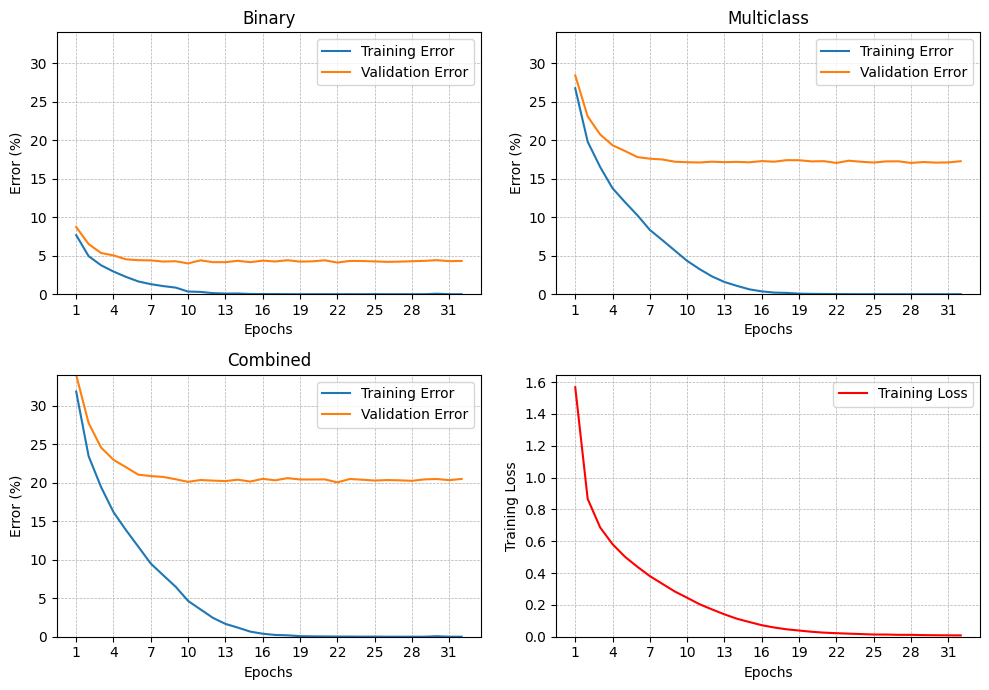



 - multioutput_lr1e-04_batch32
- Epoch 1: current lr = 1e-04
Train error: Combined=27.82%; Binary=6.66%; multiclass=23.19%; 
Validation error: Combined=30.22%; Binary=7.37%; multiclass=25.22%; 
Loss: 1.414e+00
- Epoch 2: current lr = 1e-04
Train error: Combined=21.59%; Binary=4.58%; multiclass=18.07%; 
Validation error: Combined=24.73%; Binary=5.70%; multiclass=20.57%; 
Loss: 9.239e-01
- Epoch 3: current lr = 1e-04
Train error: Combined=17.98%; Binary=3.55%; multiclass=15.17%; 
Validation error: Combined=21.70%; Binary=4.75%; multiclass=18.31%; 
Loss: 7.827e-01
- Epoch 4: current lr = 1e-04
Train error: Combined=15.75%; Binary=3.08%; multiclass=13.29%; 
Validation error: Combined=20.22%; Binary=4.42%; multiclass=16.92%; 
Loss: 6.966e-01
- Epoch 5: current lr = 1e-04
Train error: Combined=14.02%; Binary=2.65%; multiclass=11.80%; 
Validation error: Combined=19.11%; Binary=3.99%; multiclass=16.09%; 
Loss: 6.316e-01
- Epoch 10: current lr = 1e-04
Train error: Combined=7.94%; Binary=1.28%

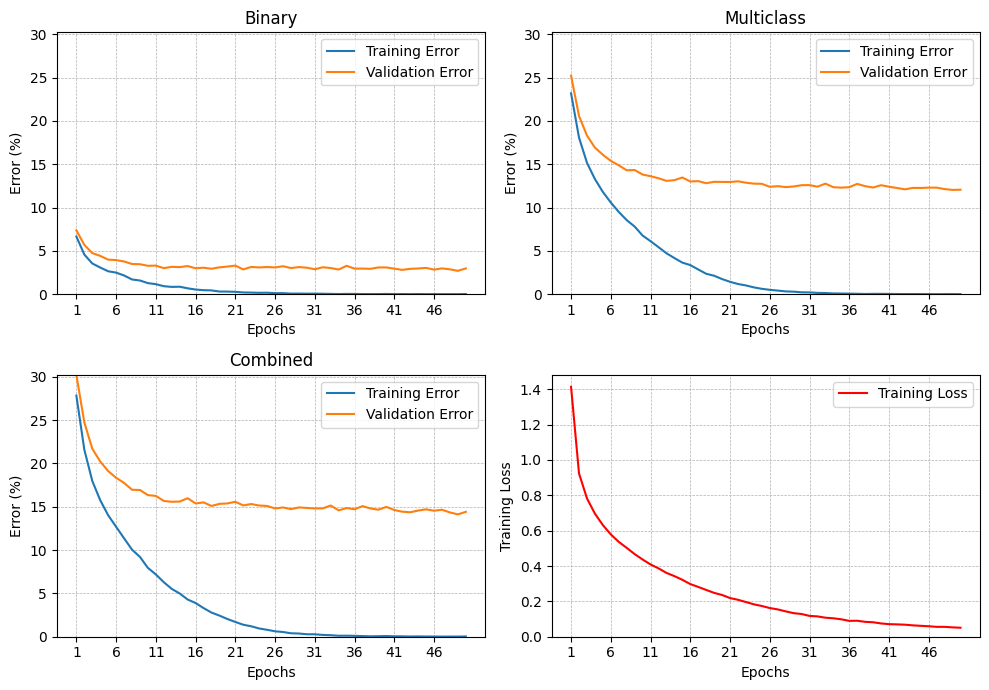



 - multioutput_lr1e-04_batch512
- Epoch 1: current lr = 1e-04
Train error: Combined=65.75%; Binary=21.32%; multiclass=56.91%; 
Validation error: Combined=65.74%; Binary=21.43%; multiclass=57.12%; 
Loss: 2.610e+00
- Epoch 2: current lr = 1e-04
Train error: Combined=54.83%; Binary=16.61%; multiclass=46.38%; 
Validation error: Combined=55.40%; Binary=16.88%; multiclass=46.78%; 
Loss: 1.947e+00
- Epoch 3: current lr = 1e-04
Train error: Combined=48.36%; Binary=13.92%; multiclass=40.61%; 
Validation error: Combined=49.95%; Binary=14.75%; multiclass=41.66%; 
Loss: 1.636e+00
- Epoch 4: current lr = 1e-04
Train error: Combined=43.70%; Binary=12.14%; multiclass=36.52%; 
Validation error: Combined=45.66%; Binary=13.18%; multiclass=38.06%; 
Loss: 1.441e+00
- Epoch 5: current lr = 1e-04
Train error: Combined=40.41%; Binary=10.88%; multiclass=33.69%; 
Validation error: Combined=42.35%; Binary=12.07%; multiclass=35.14%; 
Loss: 1.309e+00
- Epoch 10: current lr = 1e-04
Train error: Combined=30.73%; 

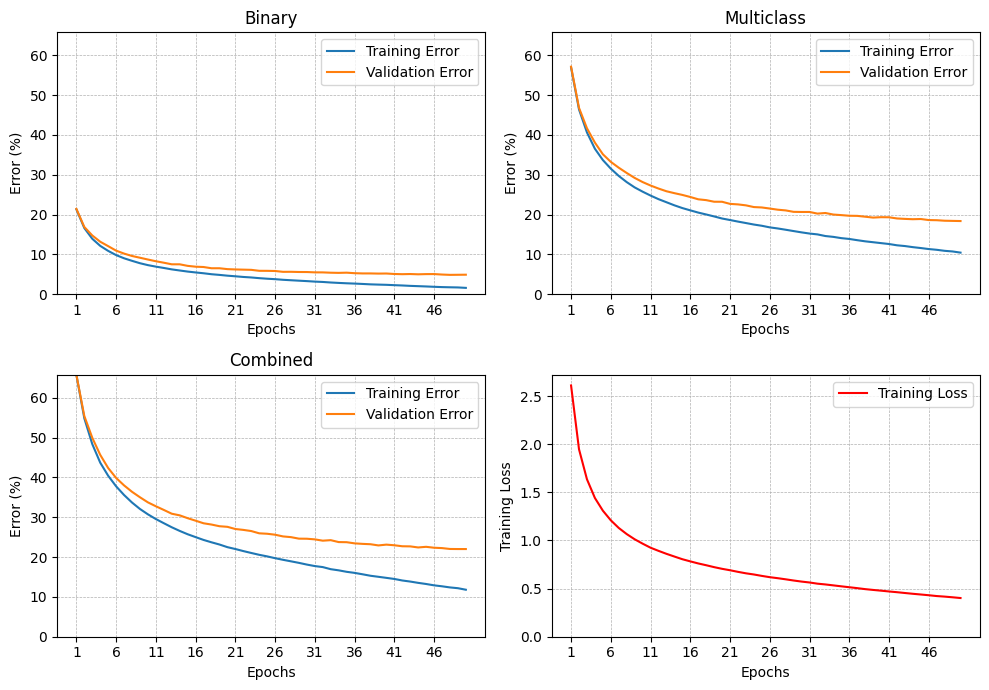

In [3]:
model_init_function = models.multioutput
epochs = 50
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 512]

min_epochs = 20
stopping_patience = 10
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, pin_memory=True, prefetch_factor=6)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_errors, val_errors, train_loss = cnn_functions.train_network_multioutput(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats_multioutput(train_errors, val_errors, train_loss)
        model_name += f"_epochs{len(train_errors['binary'])}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_errors': train_errors,
            'val_errors': val_errors,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)



 - multioutput_1hidden_lr1e-02_batch32
- Epoch 1: current lr = 1e-02
Train error: Combined=26.03%; Binary=7.34%; multiclass=20.73%; 
Validation error: Combined=27.29%; Binary=7.66%; multiclass=22.05%; 
Loss: 1.372e+00
- Epoch 2: current lr = 1e-02
Train error: Combined=18.76%; Binary=4.43%; multiclass=15.32%; 
Validation error: Combined=21.44%; Binary=5.01%; multiclass=17.76%; 
Loss: 8.880e-01
- Epoch 3: current lr = 1e-02
Train error: Combined=17.46%; Binary=4.97%; multiclass=13.20%; 
Validation error: Combined=21.09%; Binary=6.00%; multiclass=16.14%; 
Loss: 7.289e-01
- Epoch 4: current lr = 1e-02
Train error: Combined=16.95%; Binary=4.47%; multiclass=13.15%; 
Validation error: Combined=21.88%; Binary=5.73%; multiclass=17.24%; 
Loss: 6.063e-01
- Epoch 5: current lr = 1e-02
Train error: Combined=13.40%; Binary=4.38%; multiclass=9.65%; 
Validation error: Combined=19.14%; Binary=5.73%; multiclass=14.75%; 
Loss: 5.210e-01
- Epoch 10: current lr = 1e-02
Train error: Combined=9.59%; Binar

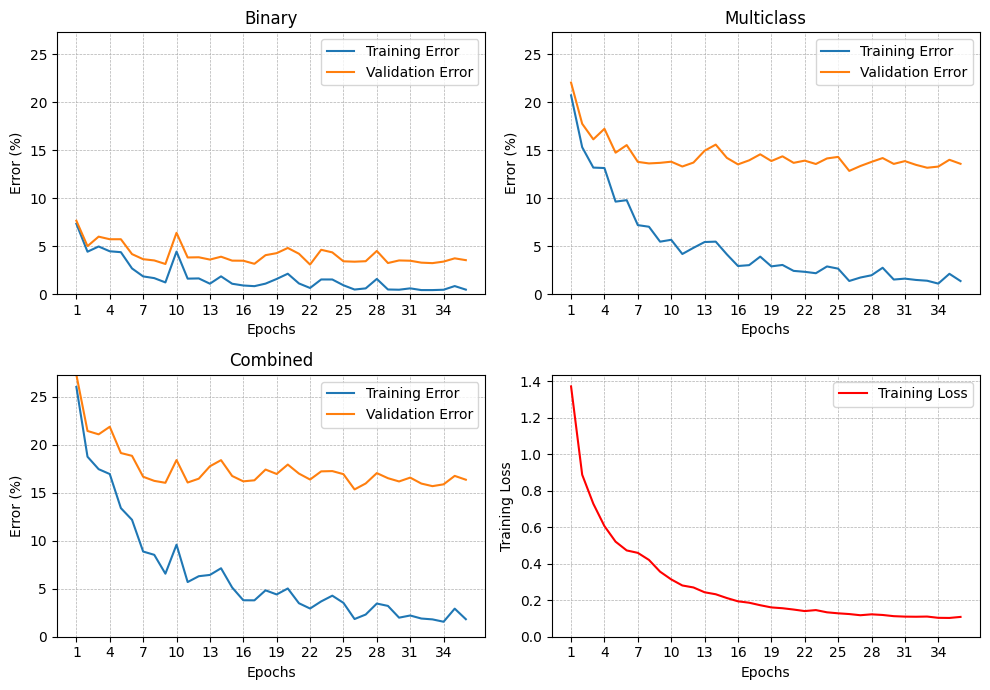



 - multioutput_1hidden_lr1e-02_batch512
- Epoch 1: current lr = 1e-02
Train error: Combined=21.66%; Binary=6.46%; multiclass=16.36%; 
Validation error: Combined=24.27%; Binary=7.36%; multiclass=18.41%; 
Loss: 1.146e+00
- Epoch 2: current lr = 1e-02
Train error: Combined=13.72%; Binary=2.48%; multiclass=11.62%; 
Validation error: Combined=18.22%; Binary=3.81%; multiclass=15.32%; 
Loss: 5.365e-01
- Epoch 3: current lr = 1e-02
Train error: Combined=10.17%; Binary=1.84%; multiclass=8.51%; 
Validation error: Combined=17.13%; Binary=3.48%; multiclass=14.34%; 
Loss: 3.910e-01
- Epoch 4: current lr = 1e-02
Train error: Combined=7.51%; Binary=1.22%; multiclass=6.40%; 
Validation error: Combined=16.13%; Binary=3.41%; multiclass=13.33%; 
Loss: 3.019e-01
- Epoch 5: current lr = 1e-02
Train error: Combined=6.74%; Binary=1.04%; multiclass=5.79%; 
Validation error: Combined=16.48%; Binary=3.34%; multiclass=13.89%; 
Loss: 2.343e-01
- Epoch 10: current lr = 1e-02
Train error: Combined=2.69%; Binary=0

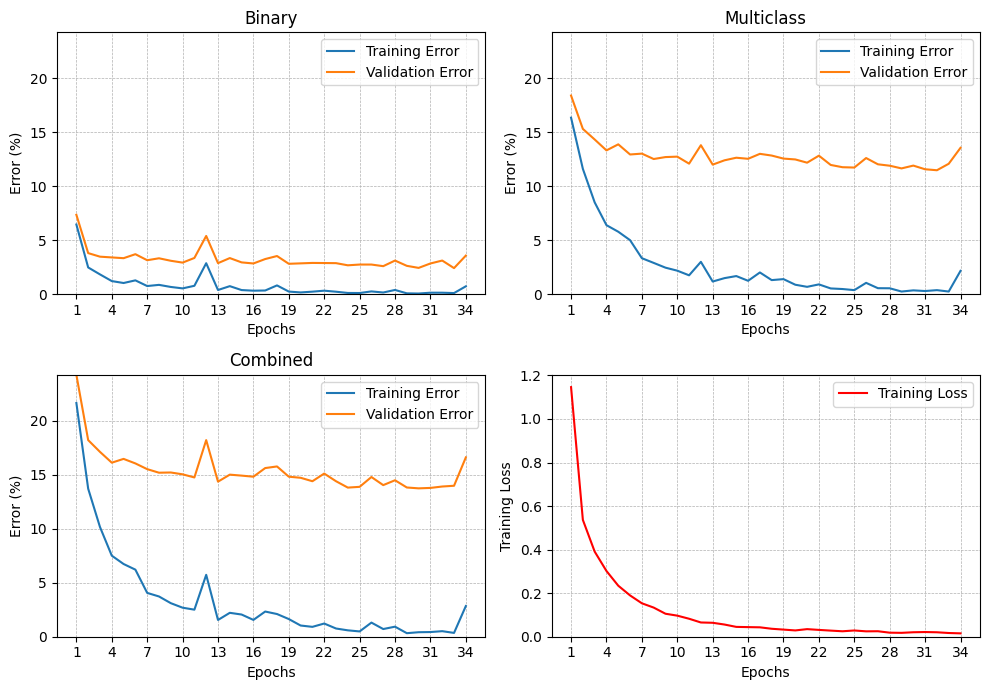



 - multioutput_1hidden_lr1e-03_batch32
- Epoch 1: current lr = 1e-03
Train error: Combined=16.77%; Binary=3.35%; multiclass=14.05%; 
Validation error: Combined=19.48%; Binary=3.94%; multiclass=16.38%; 
Loss: 1.089e+00
- Epoch 2: current lr = 1e-03
Train error: Combined=12.61%; Binary=2.55%; multiclass=10.42%; 
Validation error: Combined=16.90%; Binary=3.72%; multiclass=13.96%; 
Loss: 6.771e-01
- Epoch 3: current lr = 1e-03
Train error: Combined=10.72%; Binary=2.09%; multiclass=8.90%; 
Validation error: Combined=15.60%; Binary=3.15%; multiclass=13.19%; 
Loss: 5.497e-01
- Epoch 4: current lr = 1e-03
Train error: Combined=8.54%; Binary=1.85%; multiclass=6.91%; 
Validation error: Combined=14.94%; Binary=3.33%; multiclass=12.42%; 
Loss: 4.627e-01
- Epoch 5: current lr = 1e-03
Train error: Combined=7.57%; Binary=1.49%; multiclass=6.22%; 
Validation error: Combined=14.60%; Binary=2.97%; multiclass=12.26%; 
Loss: 3.987e-01
- Epoch 10: current lr = 1e-03
Train error: Combined=2.97%; Binary=0.

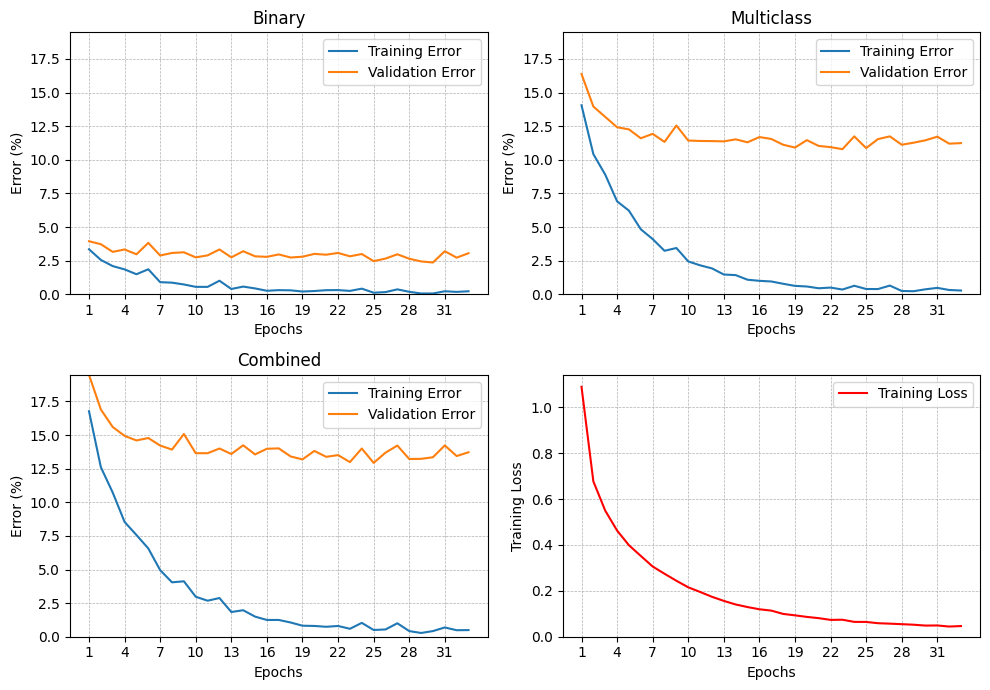



 - multioutput_1hidden_lr1e-03_batch512
- Epoch 1: current lr = 1e-03
Train error: Combined=39.88%; Binary=9.98%; multiclass=33.97%; 
Validation error: Combined=41.30%; Binary=10.90%; multiclass=35.04%; 
Loss: 2.284e+00
- Epoch 2: current lr = 1e-03
Train error: Combined=27.70%; Binary=6.08%; multiclass=23.51%; 
Validation error: Combined=30.37%; Binary=7.08%; multiclass=25.61%; 
Loss: 1.163e+00
- Epoch 3: current lr = 1e-03
Train error: Combined=22.74%; Binary=4.42%; multiclass=19.47%; 
Validation error: Combined=26.09%; Binary=5.36%; multiclass=22.36%; 
Loss: 8.818e-01
- Epoch 4: current lr = 1e-03
Train error: Combined=19.46%; Binary=3.43%; multiclass=16.79%; 
Validation error: Combined=23.39%; Binary=4.72%; multiclass=20.06%; 
Loss: 7.456e-01
- Epoch 5: current lr = 1e-03
Train error: Combined=17.23%; Binary=3.02%; multiclass=14.86%; 
Validation error: Combined=22.04%; Binary=4.58%; multiclass=18.71%; 
Loss: 6.515e-01
- Epoch 10: current lr = 1e-03
Train error: Combined=9.36%; Bi

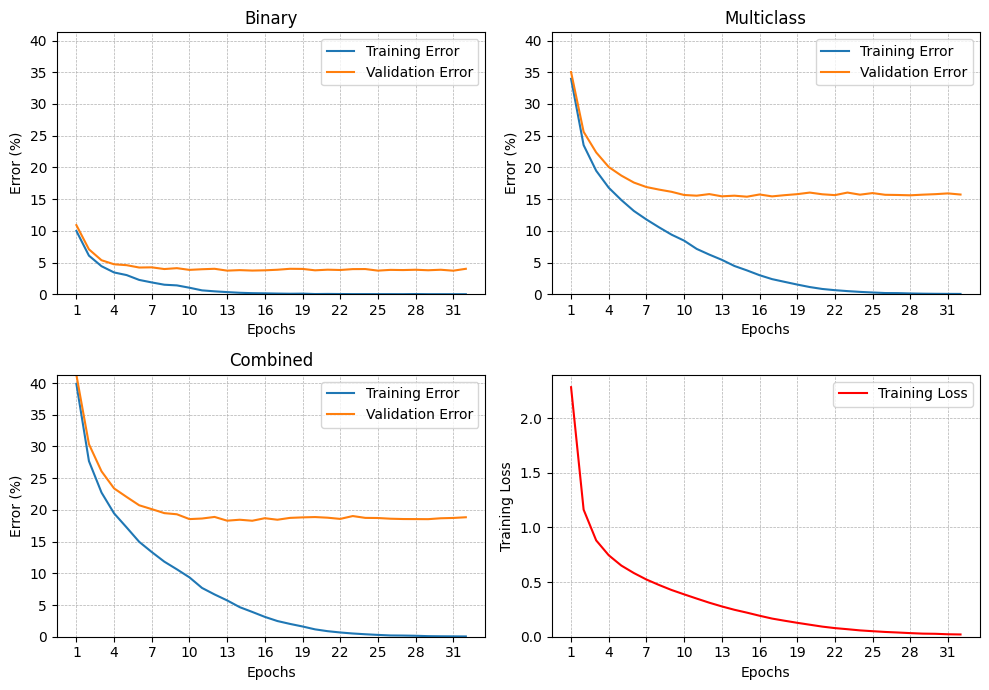



 - multioutput_1hidden_lr1e-04_batch32
- Epoch 1: current lr = 1e-04
Train error: Combined=33.53%; Binary=7.71%; multiclass=28.55%; 
Validation error: Combined=35.17%; Binary=8.04%; multiclass=30.12%; 
Loss: 1.952e+00
- Epoch 2: current lr = 1e-04
Train error: Combined=24.75%; Binary=5.20%; multiclass=21.03%; 
Validation error: Combined=27.16%; Binary=6.05%; multiclass=22.89%; 
Loss: 1.149e+00
- Epoch 3: current lr = 1e-04
Train error: Combined=20.79%; Binary=4.05%; multiclass=17.70%; 
Validation error: Combined=23.69%; Binary=4.96%; multiclass=20.05%; 
Loss: 9.499e-01
- Epoch 4: current lr = 1e-04
Train error: Combined=18.12%; Binary=3.47%; multiclass=15.37%; 
Validation error: Combined=21.21%; Binary=4.52%; multiclass=17.85%; 
Loss: 8.389e-01
- Epoch 5: current lr = 1e-04
Train error: Combined=16.21%; Binary=2.93%; multiclass=13.81%; 
Validation error: Combined=20.36%; Binary=4.08%; multiclass=17.23%; 
Loss: 7.657e-01
- Epoch 10: current lr = 1e-04
Train error: Combined=10.38%; Bin

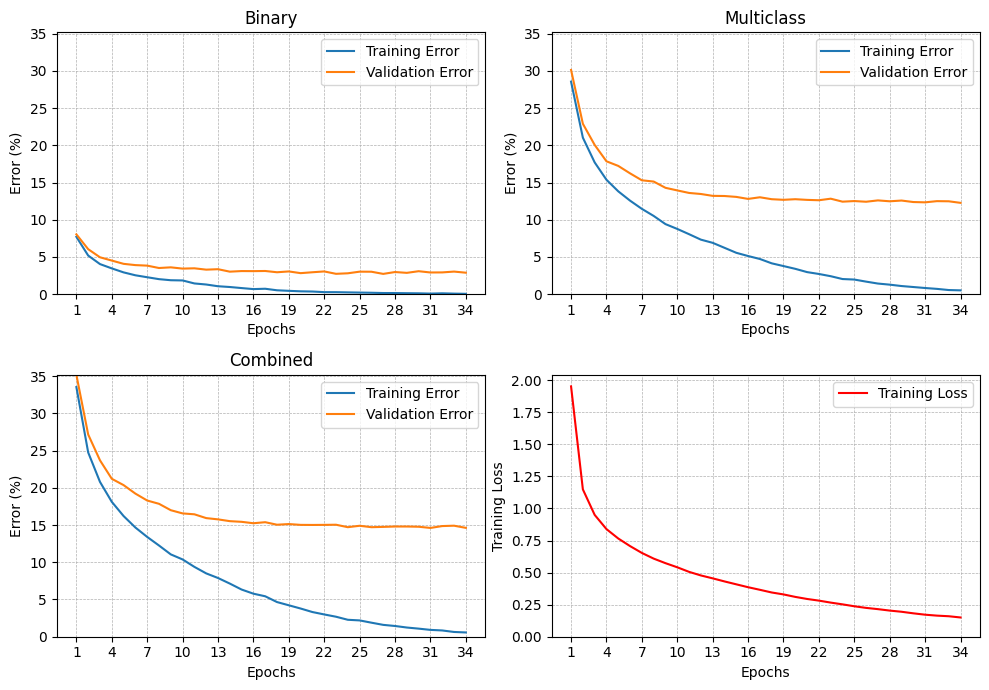



 - multioutput_1hidden_lr1e-04_batch512
- Epoch 1: current lr = 1e-04
Train error: Combined=85.50%; Binary=29.20%; multiclass=79.77%; 
Validation error: Combined=85.17%; Binary=29.38%; multiclass=79.64%; 
Loss: 3.508e+00
- Epoch 2: current lr = 1e-04
Train error: Combined=72.14%; Binary=23.40%; multiclass=64.50%; 
Validation error: Combined=71.94%; Binary=23.35%; multiclass=64.82%; 
Loss: 3.031e+00
- Epoch 3: current lr = 1e-04
Train error: Combined=63.85%; Binary=19.64%; multiclass=55.71%; 
Validation error: Combined=63.65%; Binary=19.69%; multiclass=55.65%; 
Loss: 2.672e+00
- Epoch 4: current lr = 1e-04
Train error: Combined=58.20%; Binary=16.90%; multiclass=50.11%; 
Validation error: Combined=57.95%; Binary=17.16%; multiclass=49.90%; 
Loss: 2.361e+00
- Epoch 5: current lr = 1e-04
Train error: Combined=53.01%; Binary=14.66%; multiclass=45.42%; 
Validation error: Combined=53.80%; Binary=15.43%; multiclass=46.08%; 
Loss: 2.106e+00
- Epoch 10: current lr = 1e-04
Train error: Combined=

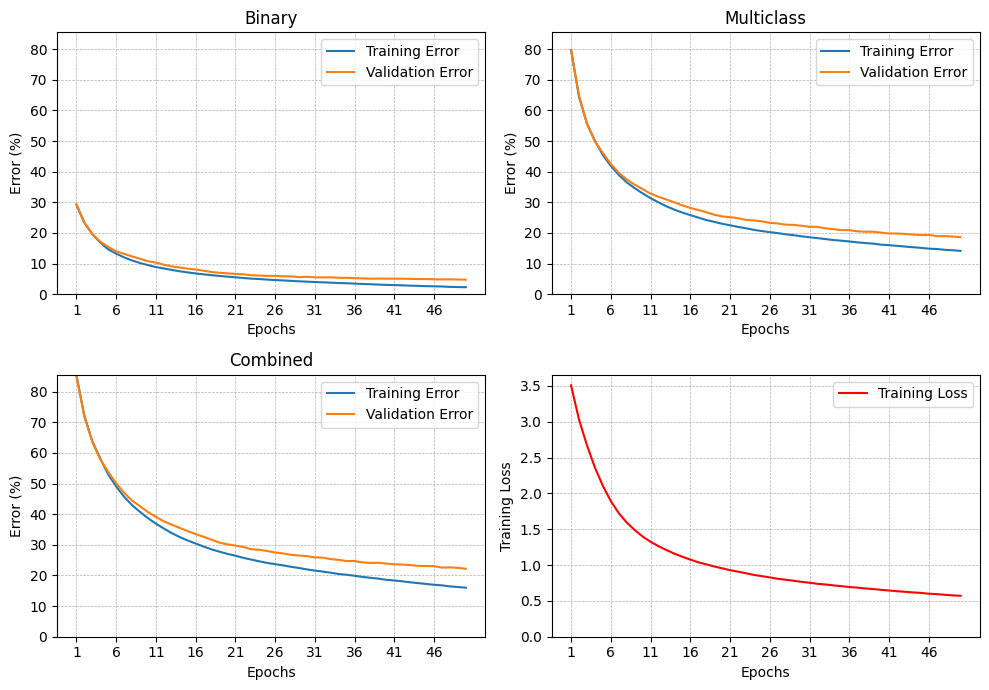

In [4]:
model_init_function = models.multioutput_1hidden
epochs = 50
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 512]

min_epochs = 20
stopping_patience = 10
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, pin_memory=True, prefetch_factor=6)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_errors, val_errors, train_loss = cnn_functions.train_network_multioutput(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats_multioutput(train_errors, val_errors, train_loss)
        model_name += f"_epochs{len(train_errors['binary'])}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_errors': train_errors,
            'val_errors': val_errors,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

the best model is multioutput_1hidden_lr1e-03_batch32

# Visualize the Images

In [ ]:
import matplotlib.pyplot as plt

dataset = train_ds
multiclass_labels_map = {
    0: "Truck",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Plane",
}
binary_labels_map = {
    0: "REAL",
    1: "FAKE"
}
figure = plt.figure(figsize=(11, 11))
cols, rows = 10, 2 
for i in range(1, cols * rows + 1):
    # Get a random image
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, true_label = dataset[sample_idx]
    # Add the image to the plot
    figure.add_subplot(rows, cols, i)
    plt.title(f'{multiclass_labels_map[i]}')
    plt.axis("off")
    img = img.cpu().numpy().transpose((1, 2, 0))
    img = Image.fromarray((img * 255).astype('uint8'))
    plt.imshow(img) 
plt.show()

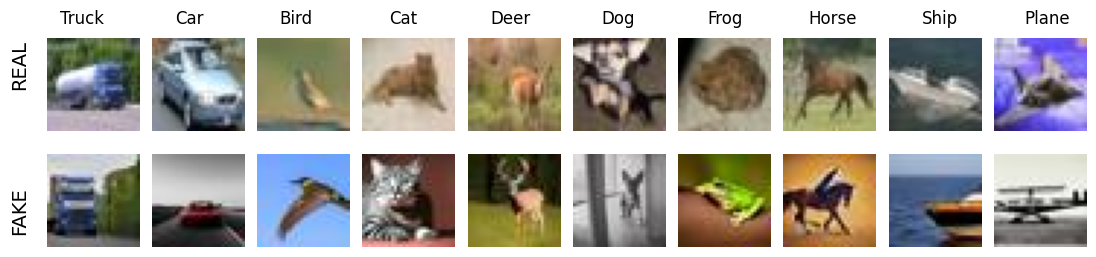

In [46]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
import numpy as np

# Assuming `train_ds` is your dataset
dataset = train_ds
multiclass_labels_map = {
    0: "Truck",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Plane",
}
binary_labels_map = {
    0: "REAL",
    1: "FAKE"
}

figure = plt.figure(figsize=(13, 3.5))
cols, rows = 10, 2

# Find one image for each combination of binary and multiclass labels
images_per_class = {(binary, multiclass): None for binary in range(2) for multiclass in range(10)}
n = 0
while 1:
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label_dict = dataset[sample_idx]
    binary_label = label_dict['binary']
    multiclass_label = label_dict['multiclass']
    if images_per_class[(binary_label, multiclass_label)] is None:
        images_per_class[(binary_label, multiclass_label)] = img
        n += 1
        if n == 20:
            break

# Plot each class image
for (binary_label, multiclass_label), img in images_per_class.items():
    ax = figure.add_subplot(rows, cols, binary_label * cols + multiclass_label + 1)
    if img is not None:
        plt.axis("off")
        img = img.cpu().numpy().transpose((1, 2, 0))
        img = Image.fromarray((img * 255).astype('uint8'))
        plt.imshow(img)
        plt.tight_layout()


# Add labels on the left and top
for i in range(2):
    figure.text(0.079, 0.7 - i * 0.42, binary_labels_map[i], va='center', ha='center', rotation='vertical', fontsize=14)
for i, label in multiclass_labels_map.items():
    figure.text(0.127 + i * 0.0825, 0.83, label, va='center', ha='center', fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
plt.show()
